Nombre: Víctor

Apellidos: Toscano Durán

## VEHÍCULO EN PENDIENTE 


Consideremos un vehículo que opera en una pendiente y utiliza paneles solares para recargarse. Puede encontrarse en uno de los tres estados de la pendiente: alto, medio y bajo. Si hace girar sus ruedas, sube la pendiente en cada paso de tiempo (de bajo a medio o de medio a alto) o se mantiene alto. Si no gira las ruedas, desciende por la pendiente en cada paso de tiempo (de alto a medio o de medio a bajo) o se mantiene bajo. Hacer girar las ruedas consume una unidad de energía por paso de tiempo. Estando en la parte alta o media de la pendiente gana tres unidades de energía por paso de tiempo a través de los paneles solares, mientras que estando en la parte baja de la pendiente no gana nada de energía por paso de tiempo. El robot quiere ganar tanta energía como sea posible.

- 1 Representa gráficamente el MDP.

Representaremos este ejercició tanto en un gráfico con nodos, que harán referencia a los posibles estados(ubicación del vehículo en la pendiente) y las aristas harán referencia a la acción realizada, que supone el posible cambio de estado. Además se indica la recompensa de tomar cada acción en cada estado.


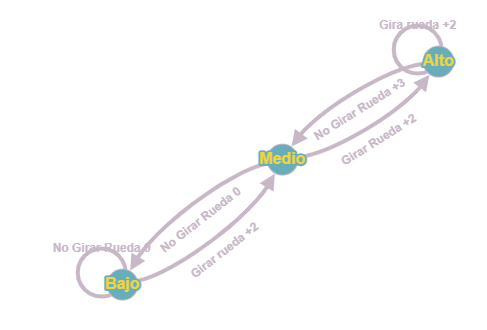

| Estado  | Acción | Resultado | Recompensa |
| --- | --- | --- | --- | 
| Bajo | Gira | Medio | +2 |
| Bajo | No Gira | Bajo | 0 |
| Medio | Gira | Alto | +2 |
| Medio | No Gira | Bajo | 0 |
| Alto | Gira | Alto | +2 |
| Alto | No Gira | Medio | +3 |

- 2 Resuelve el MDP utilizando la iteración de valores con un factor de descuento de 0,8.

In [19]:
import numpy as np

# Se definen los estados posibles: alto, medio y bajo
estados = ['alto', 'medio', 'bajo']

# Se definen las acciones posibles: girar y no girar
acciones = ['girar', 'no_girar']

# Se definen las recompensas para cada estado
recompensas = {'alto': 3, 'medio': 3, 'bajo': 0}

# Se definen la probabilidad de transicion para cada estado y acción donde el primer índice representa el estado actual y los segundos indice representa la acción tomada con la probabilidad de termina en ese o otro estado.
prob_transicion = {
    'alto': {
        'girar': {'alto': 1.0},
        'no_girar': {'medio': 1.0}
    },
    'medio': {
        'girar': {'alto': 1.0},
        'no_girar': {'medio': 1.0}
    },
    'bajo': {
        'girar': {'medio': 1.0},
        'no_girar': {'bajo': 1.0}
    }
}

# Se define la tasa de descuento
descuento = 0.8

# inicializamos los valores de los estados y hacemos la iteración de valores
valores = {estado: 0 for estado in estados}


while True:
    nuevos_valores = {}
    for estado in estados:
        valor_maximo = float('-inf')
        for accion in acciones:
            valor = recompensas[estado]
            if accion == 'girar':
                valor -= 1  # le restamos el consumo de energía al girar
            for siguiente_estado, probabilidad in prob_transicion[estado][accion].items():
                valor += descuento * probabilidad * valores[siguiente_estado]
            if valor > valor_maximo:
                valor_maximo = valor
        nuevos_valores[estado] = valor_maximo
    
    if np.allclose(list(valores.values()), list(nuevos_valores.values())):
        break
    
    valores = nuevos_valores



politica = {}
for estado in estados:
    valor_maximo = float('-inf')
    mejor_accion = None
    for accion in acciones:
        valor = recompensas[estado]
        if accion == 'girar':
            valor -= 1  # le restamos el consumo de energia al girar
        for siguiente_estado, probabilidad in prob_transicion[estado][accion].items():
            valor += descuento * probabilidad * valores[siguiente_estado]
        if valor > valor_maximo:
            valor_maximo = valor
            mejor_accion = accion
    politica[estado] = mejor_accion


print("\nPolítica óptima:")
for estado, accion in politica.items():
    print(f"{estado}: {accion}")


Política óptima:
alto: no_girar
medio: no_girar
bajo: girar


- 3 Describe la política óptima

En este caso, la política óptima es girar solo cuando estemos en el punto bajo de la pendiente y en el resto de los casos no girar las ruedas.

### Parte 2:

Supongamos ahora que el vehículo puede encontrarse en uno de los cuatro estados de la pendiente: superior, alto, medio y bajo. Si gira sus ruedas lentamente, sube la pendiente en cada paso de tiempo (de bajo a medio, o de medio a alto, o de alto a superior) con una probabilidad de 0,3, y desciende por la pendiente hasta la parte baja con una probabilidad de 0,7. Si hace girar sus ruedas rápidamente, sube la pendiente en cada paso de tiempo (de bajo a medio, o de medio a alto, o de alto a superior) con una probabilidad de 0,7 , y se desliza por la pendiente hasta llegar abajo con una probabilidad de 0,3. El giro lento de las ruedas consume una unidad de energía por paso de tiempo. Girar las ruedas rápidamente consume dos unidades de energía por unidad de tiempo. El vehículo se encuentra en la parte baja de la pendiente y su objetivo es llegar a la cima con el mínimo consumo de energía previsto.


## Solución

1- Representa gráficamente el MDP.

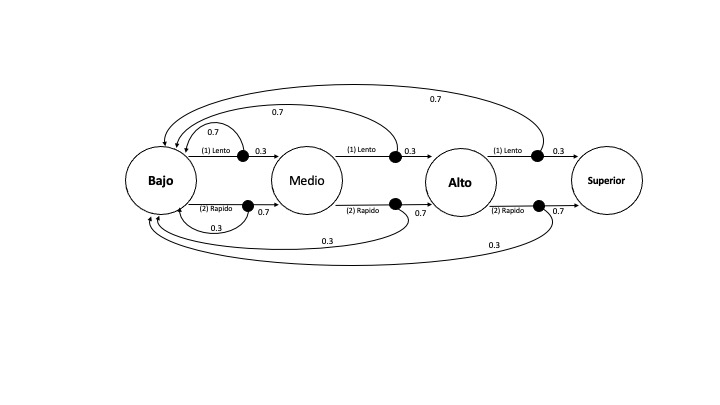

2- Resuelve el MDP utilizando iteración de valor sin descuento (es decir, iteración de valor con un factor de descuento de 1).

In [2]:
import numpy as np

# Se definen los estados posibles: superior, alto, medio y bajo
estados = ['superior', 'alto', 'medio', 'bajo']

# Se definen las acciones posibles: giro rapido y giro lento
acciones = ['giro_lento', 'giro_rapido']

# Se definen las recompensas para cada estado
recompensas = {'superior': 3, 'alto': 3, 'medio': 3, 'bajo': 0}

# Se definen la probabilidad de transicion para cada estado y acción donde el primer indice representa el estado actual y los segundos indices representa la acción tomada y la probabilidad de mantenerse en  ese estado
prob_transicion = {
    'superior': {
        'giro_lento': {'alto': 0.3, 'superior': 0.7},
        'giro_rapido': {'alto': 0.7, 'superior': 0.3}
    },
    'alto': {
        'giro_lento': {'medio': 0.3, 'alto': 0.7},
        'giro_rapido': {'medio': 0.7, 'alto': 0.3}
    },
    'medio': {
        'giro_lento': {'bajo': 0.3, 'medio': 0.7},
        'giro_rapido': {'bajo': 0.7, 'medio': 0.3}
    },
    'bajo': {
        'giro_lento': {'bajo': 0.7, 'medio': 0.3},
        'giro_rapido': {'bajo': 0.3, 'medio': 0.7}
    }
}

# Se define la tasa de descuento, en este caso seria 1
#descuento = 1

# inicializamos los valores de los estados y hacemos la iteración de valores
valores = {estado: 0 for estado in estados}

# Iteración de valores sin descuento
while True:
    nuevos_valores = {}
    for estado in estados:
        valor_maximo = float('-inf')
        for accion in acciones:
            valor = recompensas[estado]
            if accion == 'giro_lento':
                valor -= 1  # Consumo de energía al girar lentamente
            elif accion == 'giro_rapido':
                valor -= 2  # Consumo de energía al girar rápidamente
            for siguiente_estado, probabilidad in prob_transicion[estado][accion].items():
                valor += probabilidad * valores[siguiente_estado]
            if valor > valor_maximo:
                valor_maximo = valor
        nuevos_valores[estado] = valor_maximo
    
    if np.allclose(list(valores.values()), list(nuevos_valores.values())):
        break
    
    valores = nuevos_valores

# Procedemos al cálculo de la politica optima
politica = {}
for estado in estados:
    valor_maximo = float('-inf')
    mejor_accion = None
    for accion in acciones:
        valor = recompensas[estado]
        if accion == 'giro_lento':
            valor -= 1  # Consumo de energía al girar lentamente
        elif accion == 'giro_rapido':
            valor -= 2  # Consumo de energía al girar rápidamente
        for siguiente_estado, probabilidad in prob_transicion[estado][accion].items():
            valor += probabilidad * valores[siguiente_estado]
        if valor > valor_maximo:
            valor_maximo = valor
            mejor_accion = accion
    politica[estado] = mejor_accion

#imprimimos la politica optima obtenida en casa estado, es decir la acción a usar en cada estado mas recomendable
print("\nPolítica óptima:")
for estado, accion in politica.items():
    print(f"{estado}: {accion}")

C:\Users\VictorToscano\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\VictorToscano\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\VictorToscano\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



Política óptima:
superior: giro_lento
alto: giro_lento
medio: giro_lento
bajo: giro_rapido


- 3 Describe la política óptima

En este caso, la política óptima es la de girar rapido solo cuando estemos en el punto bajo de la pendiente y en el resto de los casos giramos lento las ruedas

### Explicación código

Se implementa el algoritmo de "iteración de valores" para encontrar la política óptima.El código sigue los siguientes pasos:

- Se definen los estados posibles, acciones posibles, recompensas para cada estado y la probabilidad de transición para cada estado y acción.

- Se define la tasa de descuento que determina la importancia relativa de las recompensas futuras en comparación con las recompensas inmediatas.

- Para cada estado, se calcula el valor(los "valores" se refieren a los valores esperados de los estados en un MDP que representa la utilidad esperada o la recompensa acumulada que se espera obtener cuando se toma una determinada acción desde ese estado y se sigue la política definida) de los estados. El valor máximo se actualiza considerando la recompensa del estado actual, el consumo de energía si se realiza la acción "girar" o no girar" y la suma ponderada de los valores esperados de los estados siguientes según las probabilidades de transición.Se almacenar en el diccionario de nuevos valores.

- Se verifica si los nuevos valores son lo suficientemente cercanos a los valores anteriores (con la función np.allclose) para determinar si se ha logrado la convergencia. Si esta se ha alcanzado(la convergencia), se detiene el bucle y se actualiza el diccionario "valores" con los nuevos valores calculados.

- Por último, se procede a calcular la política óptima. calculandose para cada estado el valor máximo de cada acción posible de manera similar a la iteración anterior. La acción con mayor valor guarda como la mejor acción para ese estado.













